# Pymaceuticals Inc.
---

## Analysis

As per the pie chart, the study was conducted on total 249 mice, out of which 50.2% were male and 49.8% were female mice.

The summary statistics table shows that the Mean Tumor Volume for Ramicane and Capomulin drug is lower than the other drugs and its 36.19 and 36.66 respectively. 

The bar chart shows that the # of observed timepoints for Ramicane and Capomulin are around 250 which is higher than any other drugs. 

If we look at the box plot of the distribution of tumor volume for each treatment group, the mean and median value for the Ramicane drug is almost the same, while for Capomulin drug it shows some skinness in the provided data.

The line graph of tumore volume v/s timepoint for particular mice id "I509" indicates the drastic improvement from day 20 to 35 when the tumore volume was reduced to 40-41 mm3. 

And it's growing again and reaching to a max 41.5 mm3 which is still lower than the original tumor volume.

The scatter plot indicates that the more the weight of mice the tumor volume is also higher.

Overall, the mice which were treated with Capomulin  drug is showing improvement (ref. Line graph)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.DataFrame(pd.merge(study_results,mouse_metadata,how='outer',on='Mouse ID'))

# Display the data table for preview
print(f" Total Records in Merged sheet : {len(combined_data_df)}")
combined_data_df.head()


 Total Records in Merged sheet : 1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
print(f"Total number of Unique Mice :{len(combined_data_df['Mouse ID'].unique())}")

Total number of Unique Mice :249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_ids = combined_data_df[combined_data_df.duplicated('Mouse ID',keep=False)]

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_ids['Mouse ID'])]
duplicate_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_no_duplicates = combined_data_df.drop_duplicates(subset='Mouse ID', keep='last')
data_no_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29


In [96]:
# Checking the number of mice in the clean DataFrame.
print(f'Total number of mice in clean data frame : {len(data_no_duplicates)}')

Total number of mice in clean data frame : 249


## Summary Statistics

In [97]:
data_no_duplicates['Drug Regimen'].unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_grouped = data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean = regimen_grouped.mean()
median = regimen_grouped.median()
variance = regimen_grouped.var()
std_dev = regimen_grouped.std()
sem = regimen_grouped.sem()

regimen_grouped_df = pd.DataFrame({ 'Mean Tumor Volume':mean,
                                    'Median Tumor Volume':median,
                                    'Tumor Volume Variance':variance,
                                    'Tumor Volume Std. Dev.':std_dev,
                                    'Tumor Volume Std. Err.':sem}
                                 )

    
regimen_grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [99]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

regimen_stats = data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).reset_index()

regimen_summary_df = pd.DataFrame(regimen_stats)
regimen_summary_df.rename(columns={'mean':'Mean Tumor Volume',
                                'median':'Median Tumor Volume',
                                'var':'Tumor Volume Variance',
                               'std': 'Tumor Volume Std. Dev.',
                              'sem': 'Tumor Volume Std. Err.'},inplace=True)
regimen_summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


## Bar and Pie Charts

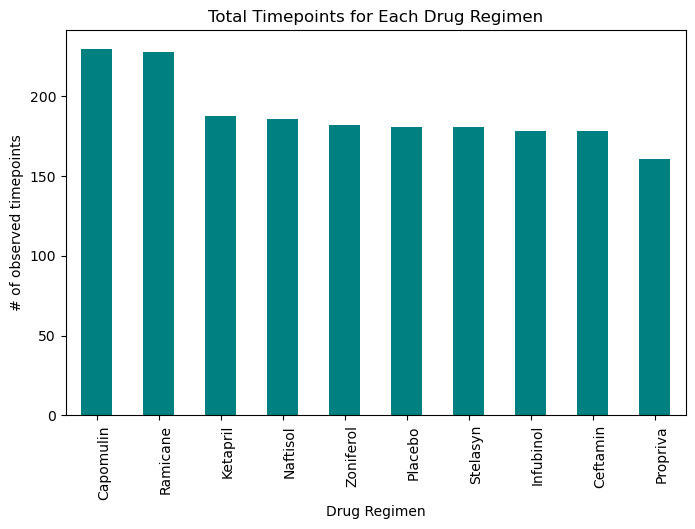

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_data = combined_data_df['Drug Regimen'].value_counts()

figure1 = regimen_data.plot(kind = 'bar' , facecolor = 'teal', figsize = (8,5),
                            title = "Total Timepoints for Each Drug Regimen",
                            xlabel = 'Drug Regimen',
                            ylabel = '# of observed timepoints')

# Configure x-tick rotation
xticklabels = regimen_data.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right', wrap=True)

plt.show()

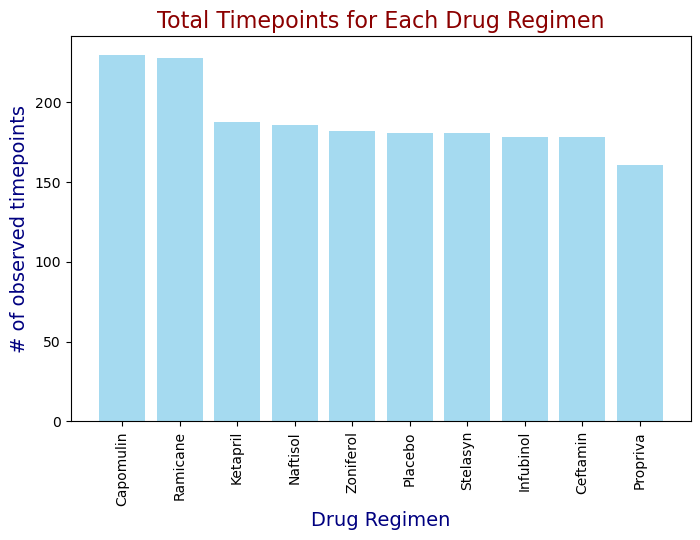

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_data = combined_data_df['Drug Regimen'].value_counts()

x_axis = np.arange(0,len(regimen_data))
tick_locations = [ drug for drug in x_axis]

y_axis = regimen_data.values

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, color="skyblue", alpha=0.75, align="center")
plt.xticks(tick_locations, regimen_data.index, rotation=90)
plt.title("Total Timepoints for Each Drug Regimen",color='darkred', fontsize=16)
plt.xlabel("Drug Regimen",color='navy',fontsize=14)
plt.ylabel("# of observed timepoints",color='navy',fontsize=14)

plt.show()

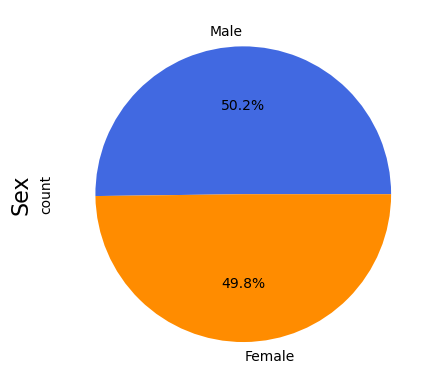

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = data_no_duplicates['Sex'].value_counts()
mice_by_sex.plot(kind='pie',autopct='%1.1f%%',colors=['royalblue','darkorange'],startangle=360)
plt.text(x=-1.5, y=0, s="Sex", fontsize=16, va='center', ha='center', rotation=90)

plt.show()

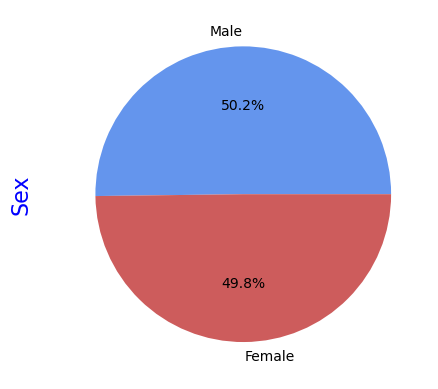

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_by_sex = data_no_duplicates['Sex'].value_counts()

sex = mice_by_sex.index
nu_of_mice = mice_by_sex.values
colors = ['cornflowerblue','indianred']
#plt.title("Distribution of Female v/s Male mice",color='navy',fontsize=16,pad =20)

plt.text(x=-1.5, y=0, s="Sex", color='blue', fontsize=16, va='center', ha='center', rotation=90)

plt.pie(nu_of_mice, labels=sex, colors=colors,
        autopct="%1.1f%%", startangle=360)
plt.axis("off")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# calculate the final tumor volume of each mouse across four of the treatment regimen
# Capomulin,Ramicane,Infubinol,Ceftamin
Capomulin_tumor_vol = data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
Ramicane_tumor_vol = data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)']
Infubinol_tumor_vol = data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
Ceftamin_tumor_vol = data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']

tumor_df = pd.DataFrame( {'Drug Regimen' :data_no_duplicates['Drug Regimen'],
                         'Tumor Volume (mm3)':data_no_duplicates['Tumor Volume (mm3)'],
                          'Capomulin_tumor_vol' : Capomulin_tumor_vol,
                         'Ramicane_tumor_vol': Ramicane_tumor_vol,
                         'Infubinol_tumor_vol':Infubinol_tumor_vol,
                         'Ceftamin_tumor_vol': Ceftamin_tumor_vol} )

tumor_df =tumor_df.fillna(0)

# Start by getting the last (greatest) timepoint for each mouse
#last timpoint reading is already retrieved in data_no_duplicates dataframe using keep='Last'
#data_no_duplicates = combined_data_df.drop_duplicates(subset='Mouse ID', keep='last')

last_timepoint = data_no_duplicates.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint['Drug Regimen'] = data_no_duplicates['Drug Regimen']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint,tumor_df,how='outer', on = 'Drug Regimen')

merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Capomulin_tumor_vol,Ramicane_tumor_vol,Infubinol_tumor_vol,Ceftamin_tumor_vol
0,t451,45,Capomulin,38.982878,38.982878,0.0,0.0,0.0
1,t451,45,Capomulin,38.939633,38.939633,0.0,0.0,0.0
2,t451,45,Capomulin,30.485985,30.485985,0.0,0.0,0.0
3,t451,45,Capomulin,37.074024,37.074024,0.0,0.0,0.0
4,t451,45,Capomulin,40.159220,40.159220,0.0,0.0,0.0


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {}

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in treatment_regimens:
    tumor_vol = data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volumes[drug] = tumor_vol

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.50,.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    iqr = upperQ - lowerQ

    # Determine outliers using upper and lower bounds
    lower_bound = lowerQ - (1.5 * iqr)
    upper_bound = upperQ + (1.5 * iqr)

    outliers = tumor_vol[(tumor_vol < lower_bound)| (tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [101]:
#Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Infubinol's potential outliers: 31    36.321346
#Name: Tumor Volume (mm3), dtype: float64
#Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

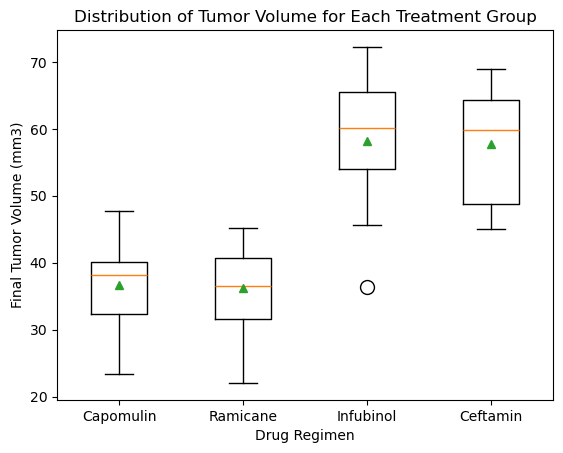

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [data_no_duplicates.loc[data_no_duplicates['Drug Regimen'] == drug,'Tumor Volume (mm3)']for drug in treatment_regimens]

box = plt.boxplot(data_to_plot, labels=treatment_regimens,showmeans=True,flierprops=dict(marker='o', color='red', markersize=10))

# Customize the plot
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

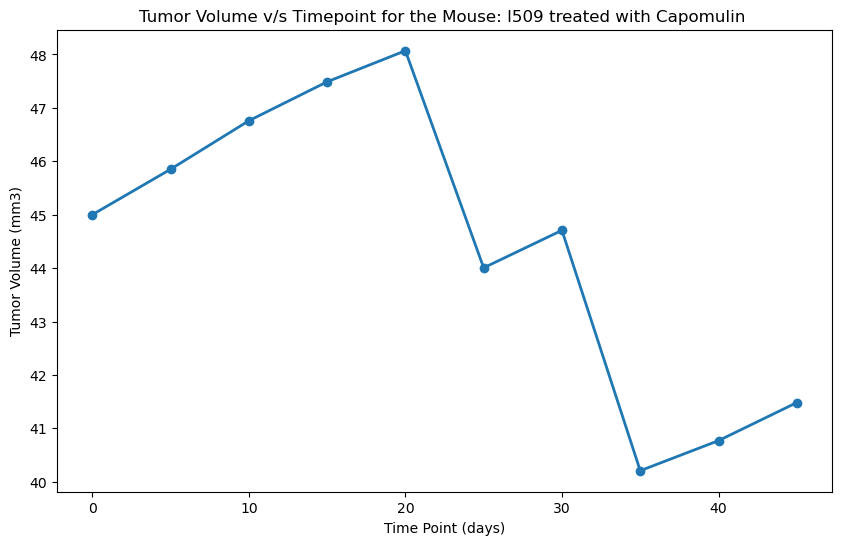

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin

mice_id = 'l509'
mice_id_data = combined_data_df[(combined_data_df['Mouse ID'] == mice_id ) & (combined_data_df['Drug Regimen'] == 'Capomulin')]

x_axis = mice_id_data['Timepoint']
y_axis = mice_id_data['Tumor Volume (mm3)']

#Generate the line plot
plt.figure(figsize=(10,6))
plt.plot(x_axis,y_axis,marker='o',linewidth=2)
plt.title(f"Tumor Volume v/s Timepoint for the Mouse: {mice_id} treated with Capomulin " )
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()

In [78]:
Capomulin_data = combined_data_df[combined_data_df['Drug Regimen'] == 'Capomulin']
len(Capomulin_data)

230

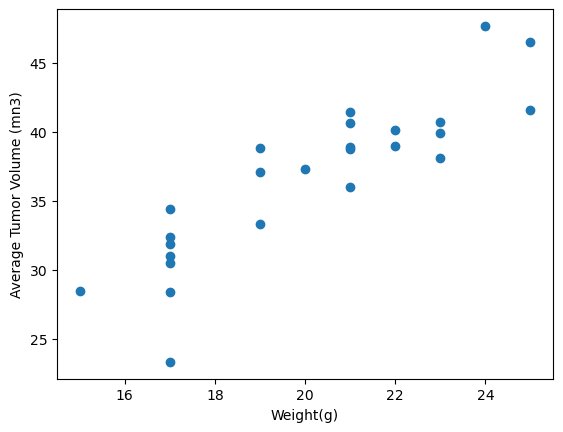

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = data_no_duplicates[data_no_duplicates['Drug Regimen'] == 'Capomulin']

x_axis = Capomulin_data['Weight (g)']
y_axis = Capomulin_data['Tumor Volume (mm3)']

plt.scatter(x_axis,y_axis)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mn3)')

plt.show()

## Correlation and Regression

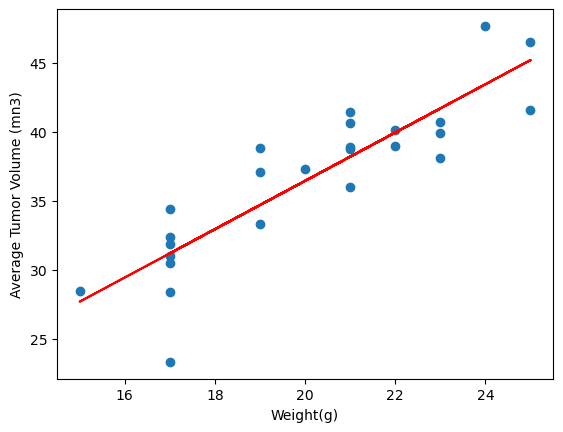

In [88]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Capomulin_data = data_no_duplicates[data_no_duplicates['Drug Regimen'] == 'Capomulin']

x_axis = Capomulin_data['Weight (g)']
y_axis = Capomulin_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="pink")

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mn3)')

plt.show()